In [1]:
pip install pandas matplotlib nltk scikit-learn vaderSentiment kaggle


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 716.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 847.4 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
df = pd.read_csv("data/AmazonReviewsProductKaggle.csv", low_memory=False)
df.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [7]:
brands = ["Maybelline", "CeraVe", "Neutrogena", "Drunk Elephant", "Tarte"]

filtered_df = df[df['reviews.text'].str.contains('|'.join(brands), case=False, na=False)]
print(filtered_df.shape)
filtered_df[['reviews.rating','reviews.title','reviews.text']].head()


(347, 21)


,reviews.rating,reviews.title,reviews.text
408,4.0,Good for the price,"It's a good starter tablet, to bad it runs on ..."
431,3.0,Ok for the price,Good starter unit. Easy for a beginner to use....
436,5.0,Great little online browser for the price,I bought these as a starter online browser. It...
1057,5.0,Purchased for Mother as a present,And she has been happy about it ever since. No...
1207,3.0,Not ad happy with this one by far,I have had every version of the Kindle since t...


In [9]:
filtered_df.to_csv("data/beauty_reviews_filtered.csv", index=False)


<Axes: title={'center': 'Rating Distribution'}, xlabel='reviews.rating'>

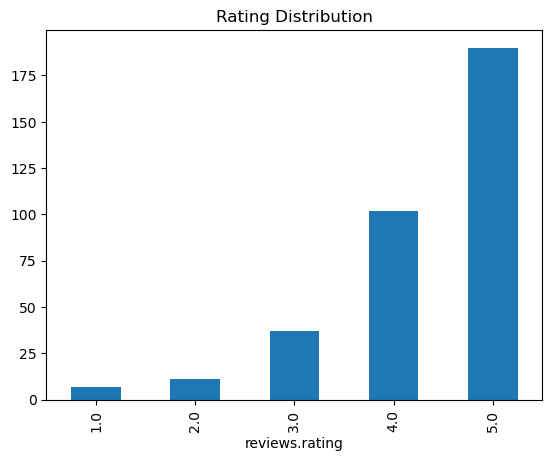

In [11]:
filtered_df['reviews.rating'].value_counts().sort_index().plot(kind="bar", title="Rating Distribution")


In [13]:
for txt in filtered_df['reviews.text'].head(5):
    print("🔹", txt, "\n")


🔹 It's a good starter tablet, to bad it runs on the Amazon OS. 

🔹 Good starter unit. Easy for a beginner to use. Priced low to give you a taste of the tablet world. 

🔹 I bought these as a starter online browser. It is a very portable pad . Great price. 

🔹 And she has been happy about it ever since. Not being that tech saavy, this specific device has a user-friendly tutorial to help get started. 

🔹 I have had every version of the Kindle since the week it was introduced and jumped at the chance for a Kindle Fire. I replaced the first one I had in 2014 and it was everything I wanted except this past summer it started overheating and got nonresponsive in the midday heat. So...I got this one. First of all I miss Swype. WHY get rid of it? Secondly I cannot put two of my favorite apps (which work on my old one) to work on this but lastly and most importantly: every once in awhile the screen freezes with a bunch of code "shimmering" in the background and only turning it off and/or leaving 

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def label_sentiment(text):
    s = analyzer.polarity_scores(str(text))['compound']
    if s >= 0.05: return 'positive'
    if s <= -0.05: return 'negative'
    return 'neutral'

filtered_df['sentiment'] = filtered_df['reviews.text'].map(label_sentiment)
filtered_df['sentiment'].value_counts()


/var/folders/hw/z2tsjsz17wx21b2my8h9zzb00000gn/T/ipykernel_35706/2296251034.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['reviews.text'].map(label_sentiment)


sentiment
positive    314
negative     22
neutral      11
Name: count, dtype: int64

In [17]:
filtered_df.to_csv("data/beauty_reviews_with_sentiment.csv", index=False)


In [1]:
import os
print(os.listdir("data"))

['beauty_reviews_filtered.csv', 'AmazonReviewsProductKaggle.csv', '.ipynb_checkpoints', 'beauty_reviews_with_sentiment.csv']
